In [4]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
import pandas as pd

import skimage.morphology
import skimage.measure
import skimage.filters

from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

import os

import tifffile

In [ ]:
# use this notebook to turn the annotation nrrd file
# into a tiff stack that just shows the borders between
# the different annotated regions

In [10]:
path_to_annot_25um = r'F:\CCF_registration_final\annotation_25.nrrd'

In [11]:
annot, header = nrrd.read(path_to_annot_25um)

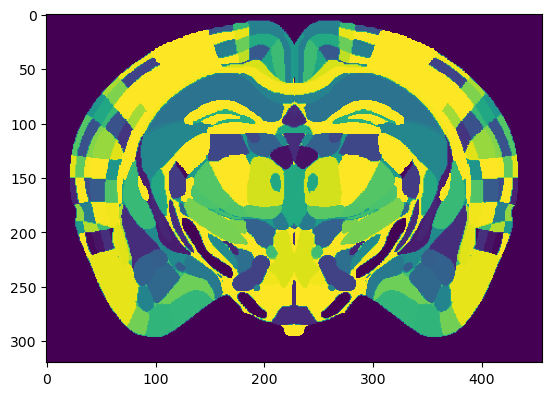

In [12]:
plt.imshow(annot[300], vmin = 0, vmax = 1000)

# make coronal borders

In [13]:
# borders of annotation
def erode_regions_edge_mask(im, size = 1):
    output = np.zeros(im.shape, dtype = im.dtype)
    vals = np.unique(im)
    ker = skimage.morphology.disk(size)
    for v in vals:
        mask1 = (im == v)
        mask2 = skimage.morphology.binary_erosion(mask1, ker)
        output += np.logical_xor(mask1, mask2)
    output = output > 0
    return output

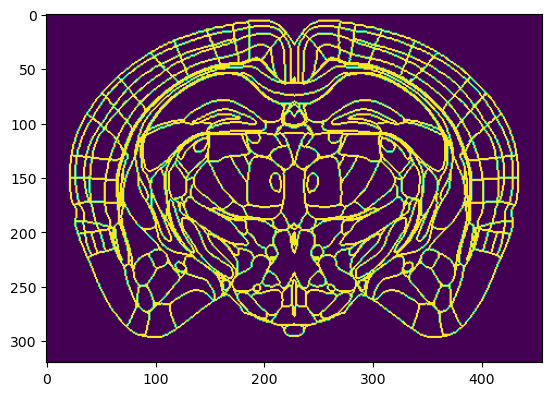

In [14]:
eroded = erode_regions_edge_mask(annot[300])
plt.imshow(eroded, vmin = 0, vmax = 1)

In [50]:
with tifffile.TiffWriter('annotations_25_border_only.tif', bigtiff=True) as tif:
    for i, frame in enumerate(annot):
        if i%10==0:
            print('working on frame {}'.format(i), end = '\r')
        tif.save((erode_regions_edge_mask(frame)*255).astype(np.uint8),
                 photometric='MINISBLACK')

In [ ]:
# Alternatively, use 10 um/pix annotations
# then resample to 25 um/pix in Skimage or ImageJ...

# make sagittal borders

In [20]:
# switch to sagittal orientation
annot_sa = np.swapaxes(annot[:,:,0:228], 0,2) # take only half
annot_sa.shape

(228, 320, 528)

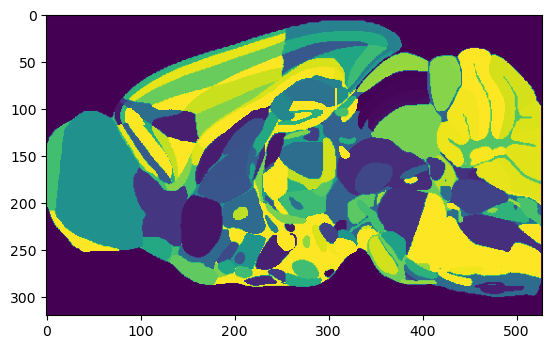

In [22]:
plt.imshow(annot_sa[200], vmin = 0, vmax = 1000)

In [19]:
with tifffile.TiffWriter('annotations_25_border_only_sagittal.tif', bigtiff=True) as tif:
    for i, frame in enumerate(annot_sa):
        if i%10==0:
            print('working on frame {}'.format(i), end = '\r')
        tif.save((erode_regions_edge_mask(frame)*255).astype(np.uint8),
                 photometric='MINISBLACK')

C:\Users\aaron\AppData\Local\Temp\ipykernel_9596\4246324162.py:5: DeprecationWarning: <tifffile.TiffWriter.save> is deprecated. Use TiffWriter.write
  tif.save((erode_regions_edge_mask(frame)*255).astype(np.uint8),
